# Mallet

Another algorithm for topic modeling is implemented in the java-based software Mallet. For this to work **you need to download and install Mallet** from http://mallet.cs.umass.edu/download.php.
Mallet uses plain text as input, so none of the preprocessing steps of this package are available for Mallet topic modeling as of yet.

#### Loading modules from DARIAH-Topics library
First, we have to get access to the functionalities of the library by importing them. For using its functions we use the prefix of the toolbox's submodules (pre, visual and mallet).

In [1]:
from dariah_topics import preprocessing as pre
from dariah_topics import visualization as visual
from dariah_topics import mallet as mal

#### Activating inline output in Jupyter notebook
The following line will just tell the notebook to show graphics in the output frames.

In [2]:
%matplotlib inline

## 1. Setting the parameters

#### Define path to corpus folder

In [3]:
path_to_corpus = "corpus_txt"
#path_to_corpus = "/home/sina/DARIAH/Topics/corpus_txt/"

#### Path to mallet folder 

Now we must tell the library where to find the local instance of mallet. If you managed to install Mallet, it is sufficient set `path_to_mallet = "mallet"`, if you just store Mallet in a local folder, you have to specify the path to the binary explictly.

In [4]:
#path_to_mallet = "/home/sina/mallet-2.0.8/bin/mallet"
path_to_mallet = "/home/severin/Documents/dariah/app/mallet/bin/mallet"

#### Output folder

In [5]:
outfolder = "tutorial_supplementals/mallet_output"
binary = "tutorial_supplementals/mallet_output/binary.mallet"

#### The Mallet corpus model

Finally, we can give all these folder paths to a Mallet function that handles all the preprocessing steps and creates a Mallet-specific corpus model object.

In [6]:
mallet_model = mal.create_mallet_binary(path_to_mallet=path_to_mallet, path_to_file=False,
                                        path_to_corpus=path_to_corpus, output_file=binary,
                                        encoding=None, token_regex=None, preserve_case=False,
                                        remove_stopwords=True, stoplist=None, extra_stopwords=None,
                                        stop_pattern_file=None, skip_header=False, skip_html=False,
                                        replacement_files=None, deletion_files=None, gram_sizes=None,
                                        keep_sequence=True, keep_sequence_bigrams=False,
                                        binary_features=False, save_text_in_source=False,
                                        print_output=False)

INFO mallet: Running MALLET with ['/home/severin/Documents/dariah/app/mallet/bin/mallet', 'import-dir', '--input', 'corpus_txt', '--remove-stopwords', '--keep-sequence', '--output', 'tutorial_supplementals/mallet_output/binary.mallet'] ...
INFO mallet: Saving MALLET binary to tutorial_supplementals/mallet_output/binary.mallet ...


## 2. Model creation

**Warning: this step can take quite a while!** Meaning something between some seconds and some hours depending on corpus size and the number of passes.

In [7]:
num_topics = 3
output_folder = mal.create_mallet_model(path_to_mallet = path_to_mallet, 
                                        path_to_binary = mallet_model, 
                                        folder_for_output = outfolder,
                                        num_top_words = 10,
                                        num_iterations = 500,
                                        num_topics = num_topics
                                        )

INFO mallet: Accessing Mallet with ['/home/severin/Documents/dariah/app/mallet/bin/mallet', 'train-topics', '--input', 'tutorial_supplementals/mallet_output/binary.mallet', '--num-topics', '3', '--num-iterations', '500', '--num-threads', '1', '--num-top-words', '10', '--num-icm-iterations', '0', '--random-seed', '0', '--optimize-interval', '0', '--optimize-burn-in', '200', '--use-symmetric-alpha', '--alpha', '5.0', '--beta', '0.01', '--output-topic-keys', 'tutorial_supplementals/mallet_output/topic_keys.txt', '--output-doc-topics', 'tutorial_supplementals/mallet_output/doc_topics.txt', '--doc-topics-threshold', '0.0', '--topic-word-weights-file', 'tutorial_supplementals/mallet_output/topic_word_weights.txt', '--word-topic-counts-file', 'tutorial_supplementals/mallet_output/word_topic_counts.txt', '--diagnostics-file', 'tutorial_supplementals/mallet_output/diagnostics.xml', '--xml-topic-report', 'tutorial_supplementals/mallet_output/topic_report.xml', '--xml-topic-phrase-report', 'tutor

### 2.4. Create document-topic matrix

The generated model object can now be translated into a human-readable document-topic matrix (that is a actually a pandas data frame) that constitutes our principle exchange format for topic modeling results. For generating the matrix from a Gensim model, we can use the following function:

In [8]:
doc_topic = mal.show_doc_topic_matrix("tutorial_supplementals/mallet_output")

## 3. Visualization

Now we can see the topics in the model with the following function:

**Hint:** Depending on the number of topics chosen in step 2, you might have to adjust *num_topics* in this step accordingly.

In [9]:
num_topics = 3
mal.show_topics_keys("tutorial_supplementals/mallet_output", num_topics = num_topics)

,Key 1,Key 2,Key 3,Key 4,Key 5,Key 6,Key 7,Key 8,Key 9,Key 10
Topic 1,man,holmes,back,sir,time,eyes,night,face,good,head
Topic 2,ravager,point,matter,smallest,dog,proper,fact,moore,slippers,general
Topic 3,conan,great,feet,city,made,door,floor,walls,land,back


### 3.1. Distribution of topics

#### Distribution of topics over all documents

The distribution of topics over all documents can now be visualized in a heat map:

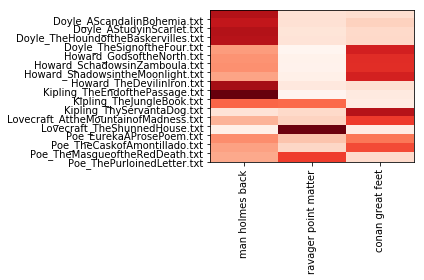

In [10]:
heatmap = visual.doc_topic_heatmap(doc_topic)
heatmap.show()

#### Distribution of topics in a single documents

To take closer look on the topics in a single text, we can use the follwing function that shows all the topics in a text and their respective proportions. To select the document, we have to give its index to the function.

<module 'matplotlib.pyplot' from '/home/severin/.local/lib/python3.5/site-packages/matplotlib/pyplot.py'>

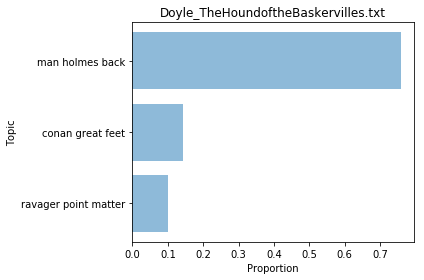

In [11]:
#document_nr = 7
visual.plot_doc_topics(doc_topic, 7)

def make_wordle_from_mallet(word_weights_file,topics,words,outfolder, 
                            font_path, dpi):

In [12]:
import pandas as pd
def read_mallet_output(word_weights_file):
        """Reads Mallet output (topics with words and word weights) into dataframe.""" 
        word_scores = pd.read_table(word_weights_file, header=None, sep="\t")
        word_scores = word_scores.sort(columns=[0,2], axis=0, ascending=[True, False])
        word_scores_grouped = word_scores.groupby(0)
        return word_scores_grouped

In [13]:
word_weights_file = "tutorial_supplementals/mallet_output/topic_word_weights.txt"
word_scores_grouped = read_mallet_output(word_weights_file)
topic_nr  = 0
word_scores_grouped.get_group(topic_nr)

AttributeError: 'DataFrame' object has no attribute 'sort'

In [ ]:
def get_wordlewords(word_scores_grouped, number_of_top_words, topic_nr):
    """Transform Mallet output for wordle generation."""
    topic_word_scores = word_scores_grouped.get_group(topic_nr)
    top_topic_word_scores = topic_word_scores.iloc[0:number_of_top_words]
    topic_words = top_topic_word_scores.loc[:,1].tolist()
    print(topic_words)
    word_scores = top_topic_word_scores.loc[:,2].tolist()
    print(word_scores)
    wordlewords = ""
    j = 0
    for word in topic_words:
        word = word
        score = word_scores[j]
        j += 1
        wordlewords = wordlewords + ((word + " ") + str(score))
    return wordlewords

In [ ]:
number_of_top_words = 7
topic_nr = 2
wordlewords = get_wordlewords(word_scores_grouped, number_of_top_words, topic_nr)

In [ ]:
wordlewords

In [ ]:
def save_topicRanks(topicWordFile, outfolder, filename):
    """Save a list of topics with their rank by topic score."""
    print("Launched save_topicRanks.")
    with open(topicWordFile, "r") as infile:
        topicRanks = pd.read_csv(infile, sep="\t", header=None)
        topicRanks = topicRanks.drop(2, axis=1)
        topicRanks.rename(columns={0:"Number"}, inplace=True)
        topicRanks.rename(columns={1:"Score"}, inplace=True)
        #topicRanks.sort(columns=["Score"], ascending=False, inplace=True)
        topicRanks["Rank"] = topicRanks["Score"].rank(ascending=False)
        #print(topicRanks.head())
        ## Saving the file.
        if not os.path.exists(outfolder):
            os.makedirs(outfolder)
        outfile = outfolder + filename
        with open(outfile, "w") as outfile: 
            topicRanks.to_csv(outfile)

In [ ]:
import os
outfolder = "/home/sina/DARIAH/Topics/tutorial_supplementals/mallet_output/"
topicWordFile = "/home/sina/DARIAH/Topics/tutorial_supplementals/mallet_output/topic_word_weights.txt"
filename = "test.csv"
save_topicRanks(topicWordFile, outfolder, filename)

In [ ]:
def get_topicRank(topic, topicRanksFile):
    #print("getting topic rank.")
    with open(topicRanksFile, "r") as infile:
        topicRanks = pd.read_csv(infile, sep=",", index_col=0)
        rank = int(topicRanks.iloc[topic]["Rank"])
    return rank

In [ ]:
topicRanksFile = "/home/sina/DARIAH/Topics/tutorial_supplementals/mallet_output/test.csv"
topic = 2
get_topicRank(topic, topicRanksFile)

In [ ]:
def plot_wordle_from_mallet(word_weights_file, 
                            numOfTopics,
                            number_of_top_words,
                            outfolder,
                            topicRanksFile,
                            dpi):
    """Generate wordles from Mallet output, using the wordcloud module."""
    print("\nLaunched make_wordle_from_mallet.")
    import os
    for topic in range(0,numOfTopics):
    ## Gets the text for one topic.
        number_of_top_words = 7
        word_scores_grouped = read_mallet_output(word_weights_file)
        text = get_wordlewords(word_scores_grouped, number_of_top_words, topic)
        wordcloud = WordCloud(width=600, height=400, background_color="white", margin=4).generate(text)
        default_colors = wordcloud.to_array()
        rank = get_topicRank(topic, topicRanksFile)
        figure_title = "topic "+ str(topic) + " ("+str(rank)+"/"+str(numOfTopics)+")"       
        #plt.imshow(wordcloud.recolor(color_func=get_color_scale, random_state=3))
        plt.imshow(default_colors)
        plt.imshow(wordcloud)
        plt.title(figure_title, fontsize=30)
        plt.axis("off")
                
        ## Saving the image file.
        if not os.path.exists(outfolder):
            os.makedirs(outfolder)
            figure_filename = "wordle_tp"+"{:03d}".format(topic) + ".png"
            plt.savefig(outfolder + figure_filename, dpi=dpi)
            return plt

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random

word_weights_file = "/home/sina/DARIAH/Topics/tutorial_supplementals/mallet_output/topic_word_weights.txt"
numOfTopics = 1
outfolder = "/home/sina/DARIAH/Topics/tutorial_supplementals/mallet_output"
dpi = 200
topicRanksFile = "/home/sina/DARIAH/Topics/tutorial_supplementals/mallet_output/test.csv"
font_path = "/home/sina/DARIAH/Topics/tutorial_supplementals/font"
number_of_top_words = 10

wordle = plot_wordle_from_mallet(word_weights_file, 
                                 numOfTopics,
                                 number_of_top_words,
                                 outfolder,
                                 topicRanksFile,
                                 dpi)